In [7]:
#following https://www.youtube.com/watch?v=AACPaoDsd50 tutorial


import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [8]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ["T-shirt", "Trowser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Boot"]


In [9]:
train_images.shape

(60000, 28, 28)

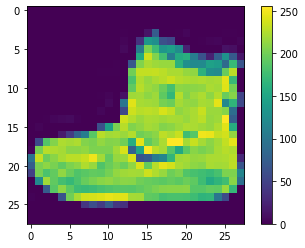

In [10]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [11]:
train_images = train_images / 255
test_images = test_images / 255

In [ ]:
plt.figure(figsize = (10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap = plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()    

In [13]:
model = keras.Sequential([keras.layers.Flatten(input_shape = (28, 28)), keras.layers.Dense(128, activation = tf.nn.relu), keras.layers.Dense(10, activation = tf.nn.softmax)])
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(train_images, train_labels, epochs = 10)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Epoch 1/10
60000/60000 [==============================] - 2s 41us/sample - loss: 0.4999 - acc: 0.8239
Epoch 2/10
60000/60000 [==============================] - 3s 54us/sample - loss: 0.3731 - acc: 0.8647
Epoch 3/10
60000/60000 [==============================] - 2s 40us/sample - loss: 0.3361 - acc: 0.8764
Epoch 4/10
60000/60000 [==============================] - 4s 62us/sample - loss: 0.3114 - acc: 0.8858
Epoch 5/10
60000/60000 [==============================] - 3s 46us/sample - loss: 0.2937 - acc: 0.8922
Epoch 6/10
60000/60000 [==============================] - 2s 39us/sample - loss: 0.2794 - acc: 0.8974
Epoch 7/10
60000/60000 [==============================] - 3s 43us/sample - loss: 0.2662 - acc: 0.9016
Epoch 8/10
60000/60000 [==============================] - 3s 48us/sample - loss: 0.2563 - acc: 0.9045
Epoch 9/10
60000/60000 [==============================] - 3s 46us/

In [14]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Accuracy:", test_acc)

10000/10000 [==============================] - 0s 26us/sample - loss: 0.3398 - acc: 0.8796
Accuracy: 0.8796


In [15]:
predictions = model.predict(test_images)

In [16]:
predictions[0]

array([1.2663970e-07, 1.8778925e-11, 1.4398170e-10, 9.4786003e-08,
       1.2021709e-09, 2.6155123e-04, 2.2129134e-07, 4.0278684e-02,
       4.7521691e-08, 9.5945913e-01], dtype=float32)

In [17]:
np.argmax(predictions[0])

9

In [18]:
test_labels[0]

9

In [26]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap = plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = "blue"
    else:
        color = "red"
    plt.xlabel("{} {:2.0f}% ({})").format(class_names[predicted_label], 100 * np.max(predictions_array), (class_names[true_label]), color = color )
    
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color = "#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')

TypeError: Invalid shape () for image data

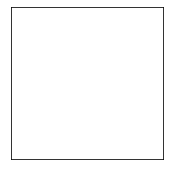

In [21]:
i = 0
plt.figure(figsize = (6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, test_images, test_labels)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions, test_labels)
plt.show()

In [23]:
img = test_images[0]
img = (np.expand_dims(img, 0))
print(img.shape)

(1, 28, 28)


In [24]:
predictions_single = model.predict(img)
print(predictions_single)

[[1.2663970e-07 1.8778925e-11 1.4398170e-10 9.4786003e-08 1.2021709e-09
  2.6155123e-04 2.2129134e-07 4.0278707e-02 4.7521691e-08 9.5945913e-01]]


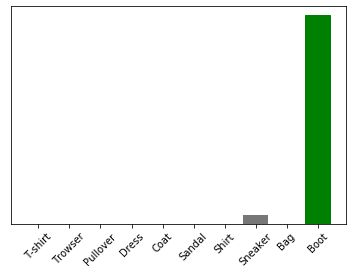

In [27]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation = 45)